In [10]:
import tensorflow as tf
from datasets.reader import mnist as mnist_reader
slim = tf.contrib.slim
layers = tf.contrib.layers
from tensorflow.python.ops import variable_scope
import numpy as np
from matplotlib import pyplot as plt

# real data

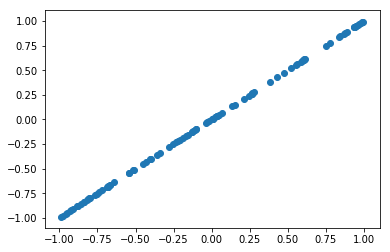

In [11]:
with tf.Graph().as_default():
    with tf.Session() as sess:
        random_noise = tf.random_uniform([100, 1])
        random_noise = (random_noise - 0.5)*2
        
        a_y = tf.constant([[1, 1]], tf.float32) #signal direction
        real_data = tf.multiply(a_y, random_noise)
        real_data = sess.run(real_data)
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(real_data[:, 0], real_data[:, 1])
        plt.show()

In [12]:
leaky_relu = lambda net: tf.nn.leaky_relu(net, alpha=0.01)
def generator(input_noise):
    gen_data = layers.fully_connected(input_noise, 2, activation_fn=None)
    return gen_data

def discriminator(data):
    logits = layers.fully_connected(data, 1, activation_fn=None)
    D_prob = tf.nn.sigmoid(logits)
    return D_prob

(1000, 2)


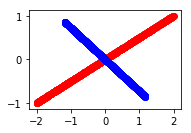

[[0.01994127]
 [0.03443532]] [-0.00210154]
0.48092172 0.5179228
0.49897262 0.5021544


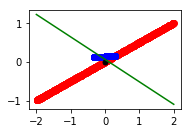

[[ 0.02220839]
 [-0.08384997]] [0.00472724]
0.49134192 0.51102525
0.4982542 0.49906656


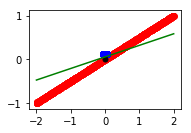

[[ 0.02668963]
 [-0.07274453]] [-0.00415293]
0.4941236 0.50379753
0.5003459 0.50170386


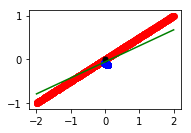

In [28]:
with tf.Graph().as_default():
    random_noise = tf.random_uniform([1000, 1])
    random_noise = (random_noise - 0.5)*2
        
    a_y = tf.constant([[2, 1]], tf.float32) #signal direction
    real_data = tf.multiply(a_y, random_noise)
    print(real_data.shape) # real_dataset
        
    with variable_scope.variable_scope('generator') as gen_scope:
        gen_data = generator(random_noise)
        
    with variable_scope.variable_scope('discriminator') as dis_scope:
        logits_real = discriminator(real_data)
    with variable_scope.variable_scope('discriminator', reuse=True):
        logits_gen = discriminator(gen_data)
        
    dis_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=dis_scope.name)
    gen_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=gen_scope.name)
        
    epsilon = 0.0006
    D_loss = -tf.reduce_mean(tf.log(logits_real + epsilon) + tf.log(1. - logits_gen + epsilon))
    G_loss = -tf.reduce_mean(tf.log(logits_gen + epsilon))
        
    D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=dis_var)
    G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_var)
    
    initializer = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(initializer)
        test_real = sess.run(real_data)
        test_gen = sess.run(gen_data)
        
        fig = plt.figure()
        ax1 = fig.add_subplot(221)
        ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
        ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
        
        for i in range(30001):
            sess.run(D_solver)
            sess.run(G_solver)
        
            if i == 10000:
                test_real = sess.run(real_data)
                test_gen = sess.run(gen_data)


                with variable_scope.variable_scope('discriminator', reuse=True):
                    weight1 = tf.get_variable('fully_connected/weights')
                    bias2 = tf.get_variable('fully_connected/biases')
                    w = sess.run(weight1)
                    b = sess.run(bias2)
                    print(w, b)
                    p1 = (0, -b/w[1])
                    p2 = (-b/w[0], 0)        


                fig = plt.figure()
                ax1 = fig.add_subplot(222)
                ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
                ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
                ax1.plot(np.array([0]), np.array([0]), c=(1,0,1))
                coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
                polynomial = np.poly1d(coefficients)
                x_axis = np.linspace(-2, 2)
                y_axis = polynomial(x_axis)
                ax1.plot(x_axis, y_axis, c='g')
                ax1.scatter(np.array([0]), np.array([0]), c=(0,0,0), s=25)
                print(sess.run(logits_real).min(), sess.run(logits_real).max())
                print(sess.run(logits_gen).min(), sess.run(logits_gen).max())
            if i == 20000:
                test_real = sess.run(real_data)
                test_gen = sess.run(gen_data)


                with variable_scope.variable_scope('discriminator', reuse=True):
                    weight1 = tf.get_variable('fully_connected/weights')
                    bias2 = tf.get_variable('fully_connected/biases')
                    w = sess.run(weight1)
                    b = sess.run(bias2)
                    print(w, b)
                    p1 = (0, -b/w[1])
                    p2 = (-b/w[0], 0)        


                fig = plt.figure()
                ax1 = fig.add_subplot(223)
                ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
                ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
                coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
                polynomial = np.poly1d(coefficients)
                x_axis = np.linspace(-2, 2)
                y_axis = polynomial(x_axis)
                ax1.plot(x_axis, y_axis, c='g')
                
                ax1.scatter(np.array([0]), np.array([0]), c=(0,0,0), s=25)
                print(sess.run(logits_real).min(), sess.run(logits_real).max())
                print(sess.run(logits_gen).min(), sess.run(logits_gen).max())          
            if i == 30000:
                test_real = sess.run(real_data)
                test_gen = sess.run(gen_data)


                with variable_scope.variable_scope('discriminator', reuse=True):
                    weight1 = tf.get_variable('fully_connected/weights')
                    bias2 = tf.get_variable('fully_connected/biases')
                    w = sess.run(weight1)
                    b = sess.run(bias2)
                    print(w, b)
                    p1 = (0, -b/w[1])
                    p2 = (-b/w[0], 0)        


                fig = plt.figure()
                ax1 = fig.add_subplot(224)
                ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
                ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
                ax1.plot(np.array([0]), np.array([0]), c=(1,0,1))
                coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
                polynomial = np.poly1d(coefficients)
                x_axis = np.linspace(-2, 2)
                y_axis = polynomial(x_axis)
                ax1.plot(x_axis, y_axis, c='g')
                ax1.scatter(np.array([0]), np.array([0]), c=(0,0,0), s=25)
                print(sess.run(logits_real).min(), sess.run(logits_real).max())
                print(sess.run(logits_gen).min(), sess.run(logits_gen).max())
            plt.show()

In [ ]:
with tf.Graph().as_default():
    random_noise = tf.random_uniform([1000, 1])
    random_noise = (random_noise - 0.5)*2
        
    a_y = tf.constant([[1, 1]], tf.float32) #signal direction
    real_data = tf.multiply(a_y, random_noise)
    print(real_data.shape) # real_dataset
        
    with variable_scope.variable_scope('generator') as gen_scope:
        gen_data = generator(random_noise) - tf.constant([[0, 1]], tf.float32)
        
    with variable_scope.variable_scope('discriminator') as dis_scope:
        logits_real = discriminator(real_data)
    with variable_scope.variable_scope('discriminator', reuse=True):
        logits_gen = discriminator(gen_data)
        
    dis_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=dis_scope.name)
    gen_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=gen_scope.name)
    
    epsilon = 0.0006
    D_loss = -tf.reduce_mean(tf.log(logits_real + epsilon) + tf.log(1. - logits_gen + epsilon))
    G_loss = -tf.reduce_mean(tf.log(logits_gen + epsilon))
        
    D_solver = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(D_loss, var_list=dis_var)
    G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_var)
    
    initializer = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(initializer)
        
        for i in range(50000):
                            
            sess.run(D_solver)
            sess.run(G_solver)
        test_real = sess.run(real_data)
        test_gen = sess.run(gen_data)

        with variable_scope.variable_scope('discriminator', reuse=True):
            weight1 = tf.get_variable('fully_connected/weights')
            bias2 = tf.get_variable('fully_connected/biases')
            w = sess.run(weight1)
            b = sess.run(bias2)
            print('dis_weight', w, '\n')
            print('dis_bias', b, '\n')
            print('prob : ', sess.run(tf.nn.sigmoid(w[0]*0.5 + w[1]*0.5 + b)), '\n') 
            p1 = (0, -b/w[1])
            p2 = (-b/w[0], 0)        

        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
        ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
        coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
        polynomial = np.poly1d(coefficients)
        x_axis = np.linspace(-8, 3)
        y_axis = polynomial(x_axis)

        ax1.plot(x_axis, y_axis, c='g')
        plt.show()
                
#
        
        print(sess.run(logits_real[:10]))
        print(sess.run(logits_gen[:10]))
        